# EEG-Based Person Identification - Simple Data Visualization
## Student Project: Basic Exploratory Data Analysis

**Project Goal:** Identify individuals based on their EEG (brain wave) signals using deep learning.

**Dataset:** 109 persons, 174,615 EEG samples, 1,280 features per sample

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Step 2: Load the Preprocessed Data

In [ ]:
# Define paths
base_data_path = r'd:\EEG\1.0.0'
dl_dir = os.path.join(base_data_path, 'deep_learning_data')
# Load the normalized features and labels
X = np.load(os.path.join(dl_dir, 'X_normalized.npy'))
y = np.load(os.path.join(dl_dir, 'y_encoded.npy'))

## Step 3: Sample Distribution - How Many Samples per Person?

Visualizing the distribution of samples across all persons.

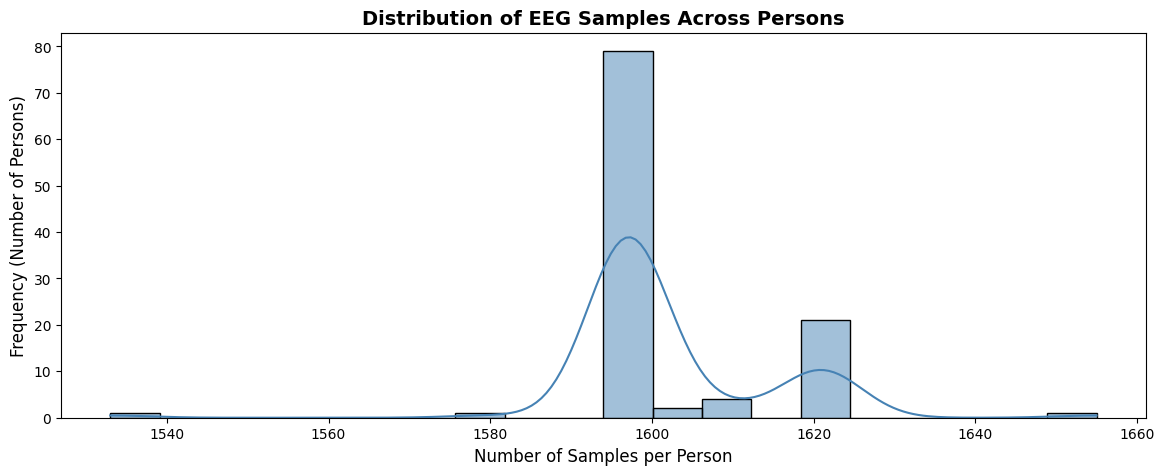

In [ ]:
unique, counts = np.unique(y, return_counts=True)
person_df = pd.DataFrame({'Person_ID': unique, 'Sample_Count': counts})

# Create distribution plot
plt.figure(figsize=(14, 5))
sns.histplot(data=person_df, x='Sample_Count', bins=20, kde=True, color='steelblue')
plt.title('Distribution of EEG Samples Across Persons', fontsize=14, fontweight='bold')
plt.xlabel('Number of Samples per Person', fontsize=12)
plt.ylabel('Frequency (Number of Persons)', fontsize=12)
plt.savefig('d:/EEG/sample_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 4: EEG Signal Patterns - Sample from Different Persons

Visualizing actual EEG feature patterns from different persons to see their uniqueness.

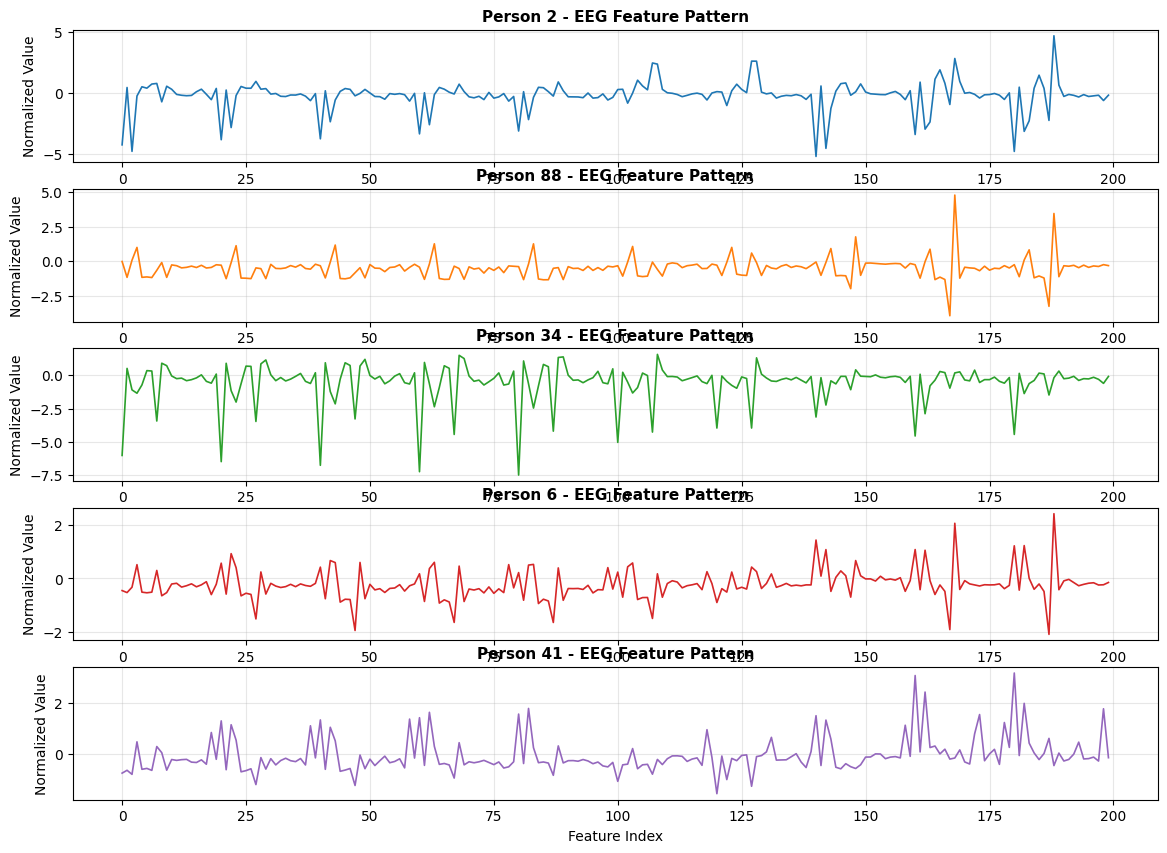

Each plot shows the EEG feature pattern for a different person.
Notice how each person has a unique pattern!


In [20]:
# Select random samples from 5 different persons
num_persons_to_show = 5
num_features_to_show = 200  
fig, axes = plt.subplots(num_persons_to_show, 1, figsize=(14, 10))
selected_persons = np.random.choice(np.unique(y), num_persons_to_show, replace=False)

for idx, person_id in enumerate(selected_persons):
    # Get a random sample from this person
    person_samples = X[y == person_id]
    sample = person_samples[0][:num_features_to_show]  # First sample, first 200 features
    # Plot
    axes[idx].plot(sample, linewidth=1.2, color=f'C{idx}')
    axes[idx].set_title(f'Person {person_id} - EEG Feature Pattern', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Normalized Value', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    if idx == num_persons_to_show - 1:
        axes[idx].set_xlabel('Feature Index', fontsize=10)

plt.savefig('d:/EEG/eeg_signal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("Each plot shows the EEG feature pattern for a different person.")
print("Notice how each person has a unique pattern!")

## Step 5: Feature Value Distributions

Understanding how feature values are distributed across the dataset.

C:\Users\PCCV\AppData\Local\Temp\ipykernel_12084\512308913.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\PCCV\AppData\Local\Temp\ipykernel_12084\512308913.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


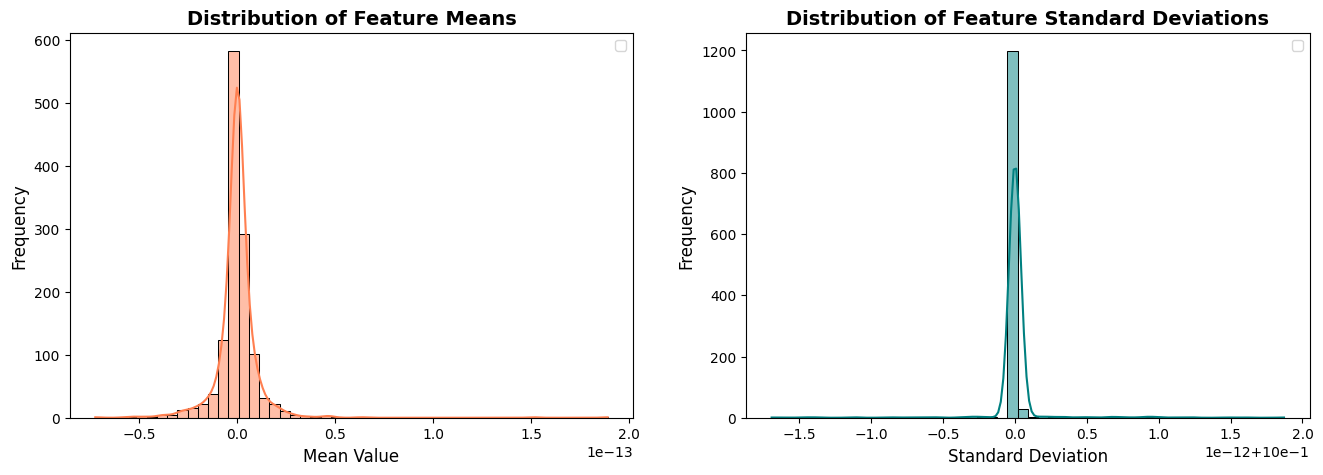

In [18]:
feature_means = X.mean(axis=0)
feature_stds = X.std(axis=0)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Plot 1: Distribution of feature means
sns.histplot(feature_means, bins=50, kde=True, ax=axes[0], color='coral')
axes[0].set_title('Distribution of Feature Means', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mean Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
# Plot 2: Distribution of feature standard deviations
sns.histplot(feature_stds, bins=50, kde=True, ax=axes[1], color='teal')
axes[1].set_title('Distribution of Feature Standard Deviations', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Standard Deviation', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
plt.savefig('d:/EEG/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



## Summary: Data Ready for Deep Learning Model

### What we visualized:
1. **Sample Distribution**: How samples are distributed across persons
2. **EEG Signal Patterns**: Unique brain wave patterns for different persons
3. **Feature Distributions**: How feature values are distributed



